<a href="https://colab.research.google.com/github/rafaelnduarte/Airbnb_Data_Analysis_NYC-XGBoost_Price_Prediction/blob/master/Airbnb_Data_Analysis_Price_prediction_(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis - New York City

[Airbnb](https://www.airbnb.com.br/) is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide.

Airbnb is the largest peer-to-peer exchange service for hospitality around the world. By 2018, the startup founded 10 years ago had already hosted ***over 300 million*** guests.

It's possible to acquire and analyze data from Airbnb, made available by them at [Inside Airbnb](http://insideairbnb.com/get-the-data.html). It's a great source of data to be used in *Data Science* projects.


### **In this *notebook*, we'll analyze the data on New York City, and see what insights we can get from it.**

# A little bit more on New York City
<center><img alt="New York City" width="40%" src="https://image.freepik.com/free-vector/future-metropolis-downtown-modern-city-business-center-cartoon-background_33099-1466.jpg"></center>


**New York City** is one of the biggest and most famous cities in the world, being one of the favorite destinations for tourists from all over the world. According to [Forbes](https://www.forbes.com/sites/alexandratalty/2019/09/04/bangkok-is-the-most-visited-city-in-the-world-again/#70ab71295f1b), New York City is currently the 7th most visited city in the world, and the most visited city in the Americas, receiving over **13.6 million** global travelers in the last year.



The *Big Apple* is Airbnb’s **largest domestic market**, but under state law, it is illegal in most buildings for an apartment to be rented out for **less than 30 days** unless the permanent tenant is **residing** in the apartment at the same time.



With all that in mind, it should be interesting to analyze the data, and see how this environment can affect Airbnb's performance in New York City.



Here you can check out more information on [Airbnb's Legal Battles](https://www.cityandstateny.com/articles/policy/technology/airbnbs-new-york-city-legal-battles.html) in New York City.



## Obtaining the Data


In [0]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

!pip install pywaffle -q
from pywaffle import Waffle

!pip install wordcloud -q
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
# importing the data into a DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2019-08-06/visualisations/listings.csv")

## Analyzing the Data


### The objective of this step is to understand the structure of the dataset

**Variable Dictionary**

* id - Listing identification number
* name - Listing name 
* host_id - Host identification number
* host_name - Host name
* neighbourhood_group - Borough name
* neighbourhood - Neighborhood name
* latitude - Latitude of the listing
* longitude  - Longitude of the listing
* room_type - Room type
* price - Price in dollars
* minimum_nights - Minimum number of nights to book the listing
* number_of_reviews - Number of reviews the listing received
* last_review - Date of the last review
* reviews_per_month - Number of reviews per month
* calculated_host_listings_count - Number of listings by the host
* availability_365 - Number of available days in a 365 days period
 
 
 
Before analyzing anything, let's see the "face"of our dataset, analyzing the first 5 entries.

In [0]:
# show the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127


### **Q1. How many attributes (variables) and entries are there in our dataset? What are the types of the variables?**

Since this is a summarized version of the data, we don't have as many variables as Airbnb actually collects.

For a more complete version of this dataset, visit [Inside Airbnb](http://data.insideairbnb.com/united-states/ny/new-york-city/2019-08-06/data/listings.csv.gz).

In [0]:
# identifying the volume of the data in the DataFrame
print("Variables:\t {}".format(df.shape[1]))
print("Entries:\t {}\n".format(df.shape[0]))


# identifying the types of the variables
display(df.dtypes)

Variables:	 16
Entries:	 48864



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Q2. What's the percentage of missing values in the dataset?

As we can see below, the percentage of missing values is quite low, with most of the variables not having any missing values.

* [reviews_per_month] and [last_review] had the biggest percentages of missing values at 20.7% (10131)
* [host_name] and [name] were the only other variables with missing values. However, their percentages are extremely low, at around 0.03% (18 and 16, respectively) 

In [0]:
# sort variables by missing values
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.207331
last_review                       0.207331
host_name                         0.000368
name                              0.000327
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

In [0]:
# checking the actual number of missing values
(df.isnull().sum()).sort_values(ascending=False)

reviews_per_month                 10131
last_review                       10131
host_name                            18
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

### **Q3. What is the statistical distribution of the data?** 

To help us understand the distribution of the data, let's plot histograms:

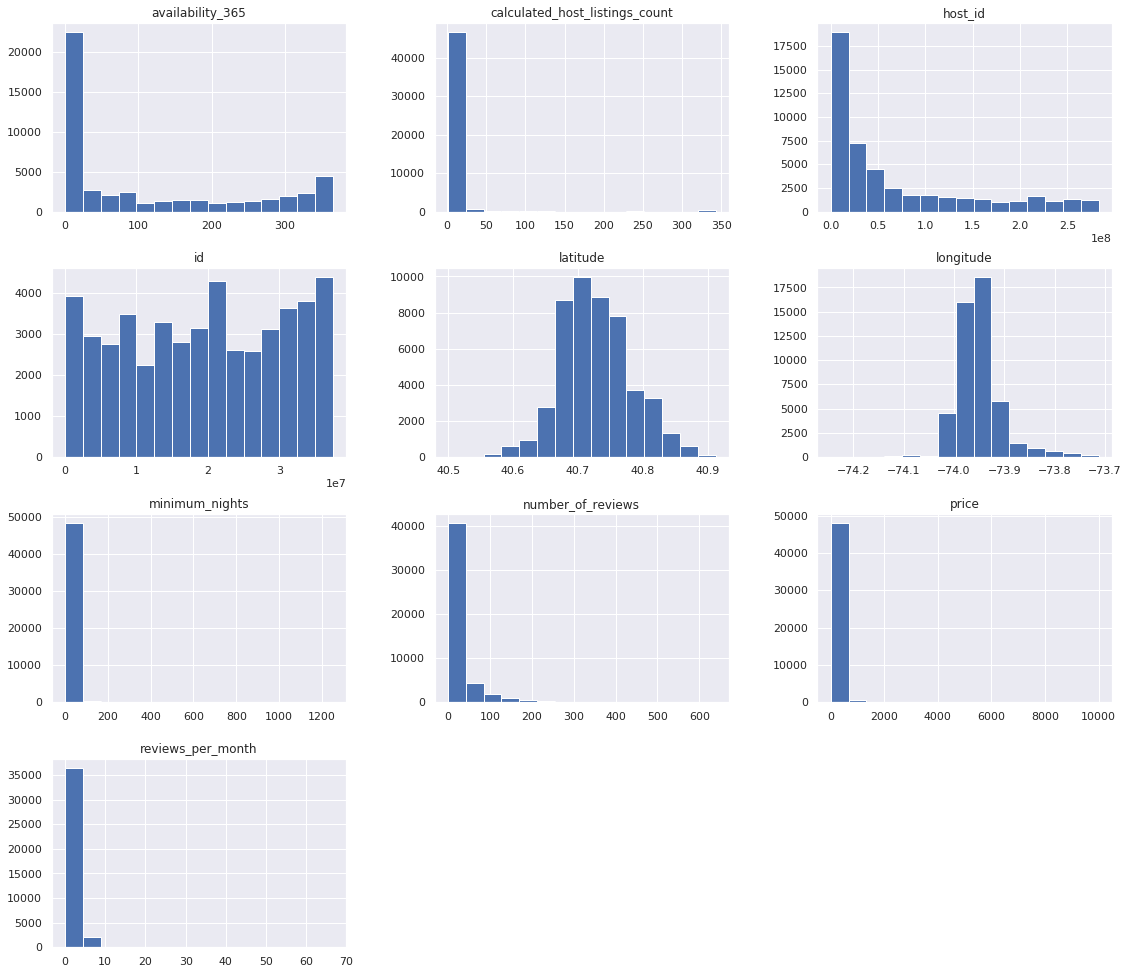

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(19,17));
sns.set()

### Q4. Are there any outliers?

We could see in the histograms above that the variables [calculated_host_linstings_count], [minimum_nights], [number_of_reviews], [price] and [reviews_per_month] have outliers.

To better understand this data, let's do the following:
* Statistical summary of the variables using describe()
* Plot boxplots for the vairables

In [0]:
# Statistical summary of the variables
df[['calculated_host_listings_count','minimum_nights', 'number_of_reviews', 'price', 'reviews_per_month']].describe()

,calculated_host_listings_count,minimum_nights,number_of_reviews,price,reviews_per_month
count,48864.000000,48864.000000,48864.000000,48864.000000,38733.000000
mean,7.438278,7.093116,23.392191,151.453176,1.365694
std,34.949053,20.264170,44.939690,236.585525,1.692891
min,1.000000,1.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,1.000000,69.000000,0.190000
50%,1.000000,2.000000,5.000000,105.000000,0.710000
75%,2.000000,5.000000,24.000000,175.000000,2.000000
max,343.000000,1250.000000,639.000000,10000.000000,66.610000


Looking at this summary, we can come to some conclusions:
* The variable [minimum_nights] at its max is way over the real limit (365 days)
* The 75% values of all of the analyzed variables are a lot lower than the max for each variable

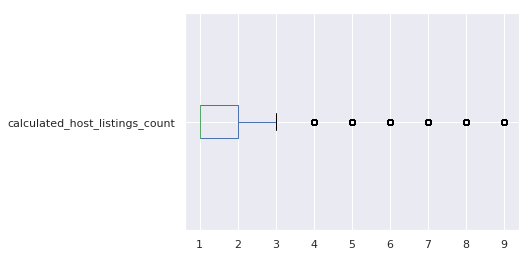

calculated_host_listings_count: entries over 10:
2948 entries
6.0331%


In [0]:
# boxplot for calculated_host_listings_count

fig, ax = plt.subplots()

df.loc[df["calculated_host_listings_count"] < 10].boxplot(['calculated_host_listings_count'], vert=False, ax=ax)

plt.show()

# check entries over 10 for host listings
print("calculated_host_listings_count: entries over 10:")
print("{} entries".format(len(df[df.calculated_host_listings_count > 10])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 10]) / df.shape[0])*100))


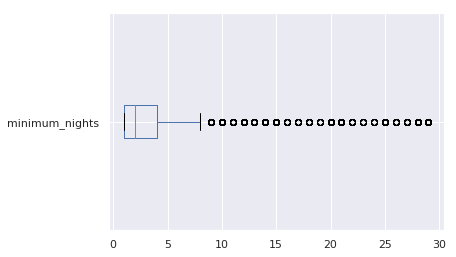

minimum_nights: entries over 30:
746 entries
1.5267%


In [0]:
# boxplot for minimum_nights

fig, ax = plt.subplots()

df.loc[df["minimum_nights"] < 30].boxplot(['minimum_nights'], vert=False, ax=ax)

plt.show()

# check entries over 30 for minimum_nights
print("minimum_nights: entries over 30:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


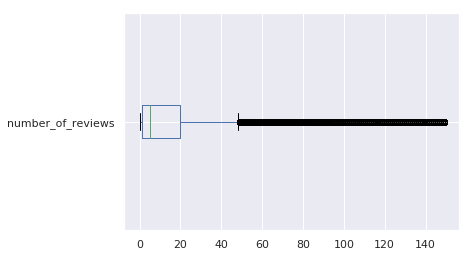

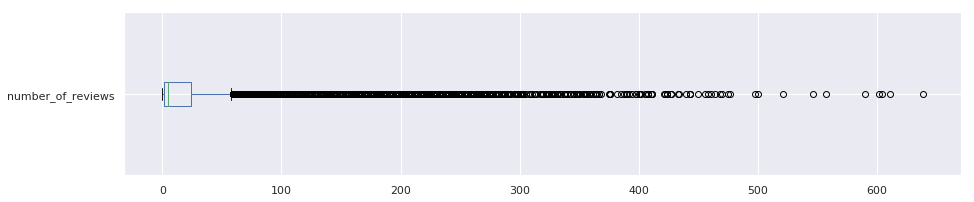

In [0]:
fig, ax = plt.subplots()

df.loc[df["number_of_reviews"] < 150].boxplot(['number_of_reviews'], vert=False, ax=ax)

plt.show()

df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

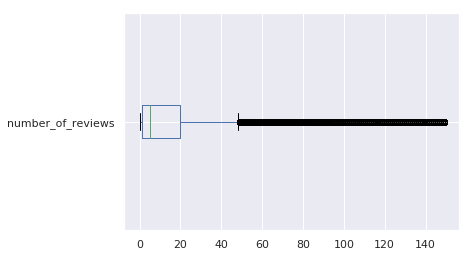

number_of_reviews: entries over 150:
1354 entries
2.7710%


In [0]:
# boxplot for number_of_reviews

fig, ax = plt.subplots()

df.loc[df["number_of_reviews"] < 150].boxplot(['number_of_reviews'], vert=False, ax=ax)

plt.show()

# check entries over 150 for number_of_reviews
print("number_of_reviews: entries over 150:")
print("{} entries".format(len(df[df.number_of_reviews > 150])))
print("{:.4f}%".format((len(df[df.number_of_reviews > 150]) / df.shape[0])*100))


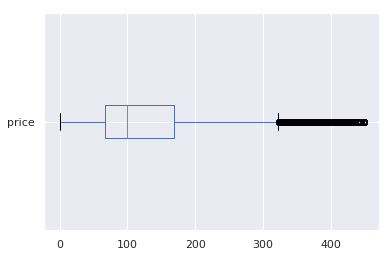

price: entries over 450:
1355 entries
2.7730%


In [0]:
# boxplot for price

fig, ax = plt.subplots()

df.loc[df["price"] < 450].boxplot(['price'], vert=False, ax=ax)

plt.show()

# check entries over price over 450
print("price: entries over 450:")
print("{} entries".format(len(df[df.price > 450])))
print("{:.4f}%".format((len(df[df.price > 450]) / df.shape[0])*100))

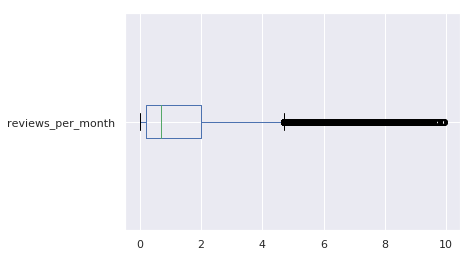

reviews_per_month: entries over 10:
74 entries
0.1514%


In [0]:
# boxplot for reviews_per_month

fig, ax = plt.subplots()

df.loc[df["reviews_per_month"] < 10].boxplot(['reviews_per_month'], vert=False, ax=ax)

plt.show()

# check entries over 10 for reviews_per_month
print("reviews_per_month: entries over 10:")
print("{} entries".format(len(df[df.reviews_per_month > 10])))
print("{:.4f}%".format((len(df[df.reviews_per_month > 10]) / df.shape[0])*100))

#### Histograms without the outliers

Now that we have identified the outliers in our variables, let's clean the DataFrame and plot histograms again.

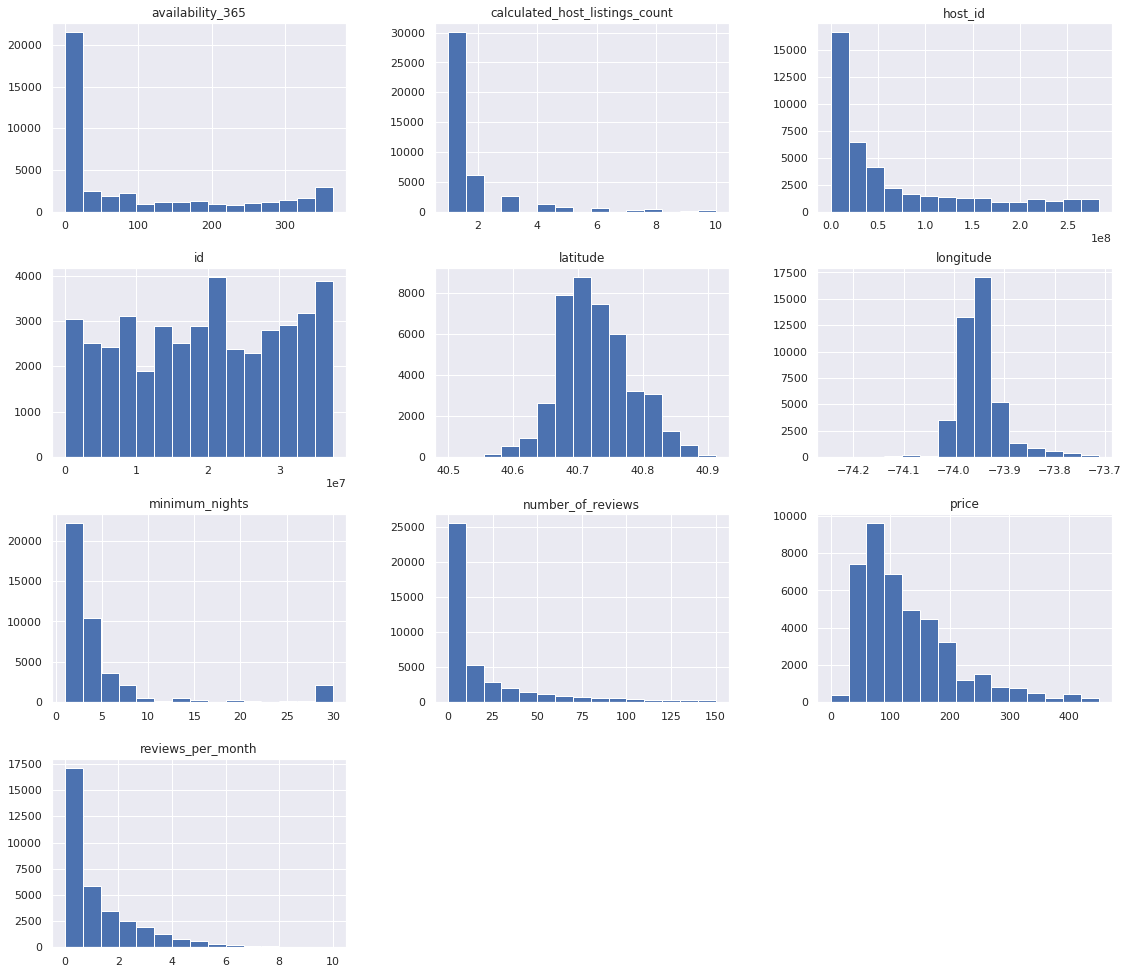

In [0]:
# removing the outliers from the DataFrame, creating a new DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 10].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 150].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 450].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 10].index, axis=0, inplace=True)


# plotting histograms for numerical values
df_clean.hist(bins=15, figsize=(19,17));
sns.set()

### **Q5. Correlation between the variables**

Correlation means there is a relationship between two things. For us, that means there is a relationship or similarity between two variables.

This relationship can be measured, and the coefficient of correlation will ascertain its intensity. To identify the correlations between the variables we're interested in, let's:

* Create a Correlation Matrix
* Create a *heatmap* from the matrix, using the seaborn library

In [0]:
# creating a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# showing the correlation matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.004278,-0.022221,-0.016941,-0.123816,0.044176
minimum_nights,-0.004278,1.000000,-0.110140,-0.189379,0.146192,0.131912
number_of_reviews,-0.022221,-0.110140,1.000000,0.520252,0.070670,0.236331
reviews_per_month,-0.016941,-0.189379,0.520252,1.000000,0.132404,0.216651
calculated_host_listings_count,-0.123816,0.146192,0.070670,0.132404,1.000000,0.332563
availability_365,0.044176,0.131912,0.236331,0.216651,0.332563,1.000000


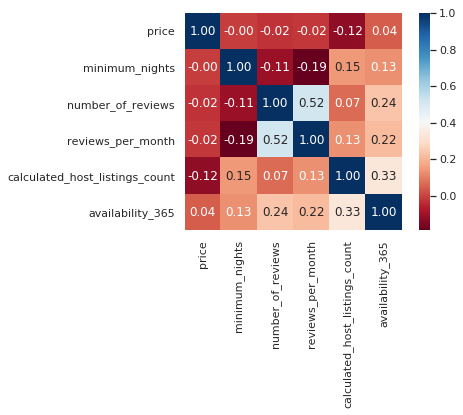

In [0]:
# plotting a heatmap for the correlations
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q6. What is the average price for rent?**

In [0]:
# checking the average price of the listings 
print('Average price:\t',  df_clean.price.mean())

Average price:	 126.16380238819949


### **Q7. What kind of listing is the most rented on Airbnb?**

The column of the variable [room_type] indicates what kind of listing it is on Airbnb. It is possible to rent an entire apartment/house, a private room, or a shared room.

Let's count the quantity of entries for each type, using the method value_counts()

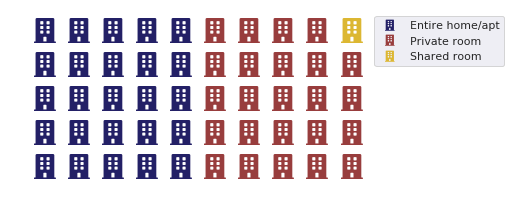

Quantity of each type of listing available:
 Entire home/apt    21177
Private room       20495
Shared room         1038
Name: room_type, dtype: int64


Percentage for each type of listing available:
 Entire home/apt    49.583236
Private room       47.986420
Shared room         2.430344
Name: room_type, dtype: float64


In [0]:
  #@title Room Type
# extracting value counts for the variable room_type
data = df_clean.room_type.value_counts().to_dict()

# plotting a waffle chart
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=10,
                colors=("#232066", "#983D3D", "#DCB732"),
                values=data, icons='building', icon_size=25,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();

# show the quantity of each type of listing available
print('Quantity of each type of listing available:\n', df_clean.room_type.value_counts())
print('\n')
# show the percentage of each type of listing available
print('Percentage for each type of listing available:\n', df_clean.room_type.value_counts() / df_clean.shape[0] * 100)


### **Q8. What's the most expensive location of the dataset?**
It's possible to check a variable in relation to another using the function  `groupby()`. In this case, we're going to compare the neighborhood in relation to their price.


In [0]:
# see the average price for each neighborhood
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]


neighbourhood
Willowbrook          299.000000
Neponsit             274.666667
NoHo                 235.233333
Tribeca              229.817204
Flatiron District    216.583333
Breezy Point         213.333333
Bay Terrace          210.000000
Midtown              209.626804
West Village         205.140845
Chelsea              195.397077
Greenwich Village    192.498489
Jamaica Estates      186.538462
Murray Hill          186.061069
SoHo                 185.146341
DUMBO                184.615385
Name: price, dtype: float64

Some of the results above stand out, being out of the ordinary, and not what we would expect when it comes to **New York City**.

Willowbrook is in *New Jersey*. Neponsit and Breezy Point are *beach areas*, and Bay Terrace and Jamaica Estates are deep in Queens, places that shouldn't be more expensive than Soho, Dumbo, Chelsea, Midtown, etc.

Let's go a little deeper into these locations to try and understand why they stand out.

In [0]:
# quantity of listings in Willowbrook
print(df[df.neighbourhood == "Willowbrook"].shape)


# show listings in Willowbrook
df[df.neighbourhood == "Willowbrook"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
33505,27088022,"Bright, Brand NEW, and Spacious, Gorgeous Home",115827173,David,Staten Island,Willowbrook,40.59886,-74.13217,Entire home/apt,299,4,11,2019-07-24,0.9,2,351


In [0]:
# quantity of listings in Neponsit
print(df[df.neighbourhood == "Neponsit"].shape)

# show listings in Neponsit
df[df.neighbourhood == "Neponsit"]


(3, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9806,7679236,Belle Harbor 4 BR 2 bath- 1 bl from Beach,40327248,Sarina,Queens,Neponsit,40.57215,-73.85822,Entire home/apt,350,2,9,2019-07-28,3.33,1,92
23455,19274199,Luxurious Country Beach Surf Loft,62608664,David,Queens,Neponsit,40.56931,-73.86122,Entire home/apt,274,2,34,2019-06-09,1.32,1,339
31293,24910361,"""The Little House by the Sea""",188328775,Donna,Queens,Neponsit,40.57043,-73.85821,Entire home/apt,200,2,10,2019-07-28,0.73,1,56


In [0]:
# quantity of listings in Breezy Point
print(df[df.neighbourhood == "Breezy Point"].shape)

# show listings in Breezy Point
df[df.neighbourhood == "Breezy Point"]

(3, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
33049,26703677,Camp Rockaway,200754542,Kent,Queens,Breezy Point,40.56605,-73.86994,Private room,195,1,4,2019-06-15,0.32,2,171
33741,27301638,Camp Rockaway,200754542,Kent,Queens,Breezy Point,40.56568,-73.87009,Private room,195,1,1,2018-08-25,0.09,2,68
46922,36417725,Ocenfront Glamping in Queens,273672846,Hectavious,Queens,Breezy Point,40.56546,-73.86968,Private room,250,1,0,NaN,NaN,1,82


In [0]:
# quantity of listings in Bay Terrace
print(df[df.neighbourhood == "Bay Terrace"].shape)

# show the listings in Bay Terrace
df[df.neighbourhood == "Bay Terrace"]

(7, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3868,2467377,Centrally located in Bayside / Nice,7801481,Inez,Queens,Bay Terrace,40.78645,-73.77958,Private room,90,3,8,2019-01-15,0.24,2,325
4916,3609762,Sunny spacious 3 BR/ 2Bth in Bayside townhouse,18189519,Irma,Queens,Bay Terrace,40.77995,-73.78506,Entire home/apt,184,3,148,2019-07-13,2.46,1,152
5845,4357892,New!!! 4 BR/2 Bth in a private house.,22727798,Roman,Queens,Bay Terrace,40.77774,-73.78376,Entire home/apt,189,3,89,2019-07-22,1.92,1,331
6939,5094593,Cozy room in a quite neighborhood,7801481,Inez,Queens,Bay Terrace,40.78598,-73.77915,Private room,99,3,4,2018-05-04,0.08,2,1
46166,35945859,纽约的家,98455047,Jessica,Queens,Bay Terrace,40.77415,-73.79218,Entire home/apt,258,1,1,2019-07-07,0.94,1,343
47789,36974101,"✨❣ Upscale Family Getaway, Pool, SPA And Gym ...",259880452,Malik,Queens,Bay Terrace,40.77914,-73.77915,Entire home/apt,999,5,0,NaN,NaN,3,365
47997,37058053,Bay Terrace Basement,7147336,Daniel,Queens,Bay Terrace,40.78157,-73.77355,Private room,440,1,1,2019-08-02,1.00,1,178


In [0]:
# show quantity of listings in Jamaica Estates
print(df[df.neighbourhood == "Jamaica Estates"].shape)

# show listings in Jamaica Estates
df[df.neighbourhood == "Jamaica Estates"]

(15, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5940,4430808,Studio-Private Entrance /Bath/Kitchen Near JFK,23002099,Sol & Izak,Queens,Jamaica Estates,40.71873,-73.80324,Entire home/apt,64,2,197,2019-07-20,3.50,1,213
7784,6079079,4 bedrooms private house,30214562,Sharon,Queens,Jamaica Estates,40.72362,-73.79100,Entire home/apt,145,4,38,2017-06-28,0.74,1,154
9108,7089310,One of a kind big home in Queens,37157641,Madi,Queens,Jamaica Estates,40.72223,-73.78565,Entire home/apt,398,4,59,2019-08-04,1.34,1,130
14511,11656721,3 bedroom near Park,46502890,Jackie,Queens,Jamaica Estates,40.72191,-73.78207,Private room,750,1,0,NaN,NaN,2,0
28148,22178073,Tranquility Stay-cation with private pool,21963202,Journey,Queens,Jamaica Estates,40.71770,-73.78689,Entire home/apt,145,1,124,2019-07-31,6.94,2,144
28830,22518123,15 to JFK/LGA 30 to Manhattan.Close to St John’s,165307387,K,Queens,Jamaica Estates,40.71248,-73.78896,Entire home/apt,85,1,94,2019-07-28,5.19,1,343
32206,25887684,Gorgeous Two Br Apt in Jamaica Estates.,194520886,Nazma,Queens,Jamaica Estates,40.71434,-73.78805,Entire home/apt,125,1,19,2019-07-29,1.71,2,168
34070,27552868,VIP staycation deluxe movie theater indoor pool,21963202,Journey,Queens,Jamaica Estates,40.71927,-73.78680,Entire home/apt,275,1,0,NaN,NaN,2,331
34142,27620424,Two bedrooms apt. in Jamaica Estates,194520886,Nazma,Queens,Jamaica Estates,40.71430,-73.78985,Entire home/apt,150,1,22,2019-08-04,1.94,2,163
35229,28587071,Private Bedroom in Queens at St. John's Univer...,215759678,Andrew,Queens,Jamaica Estates,40.71987,-73.79816,Private room,35,4,34,2019-07-31,3.42,1,239


As we can see, these neighborhoods have very little listings at higher prices than the average for other New York City neighborhoods. These locations end up being *outliers*, rendering our analysis imprecise.

When considering the previous statistics, don't account for these locations when analyzing the most expensive areas in the city.

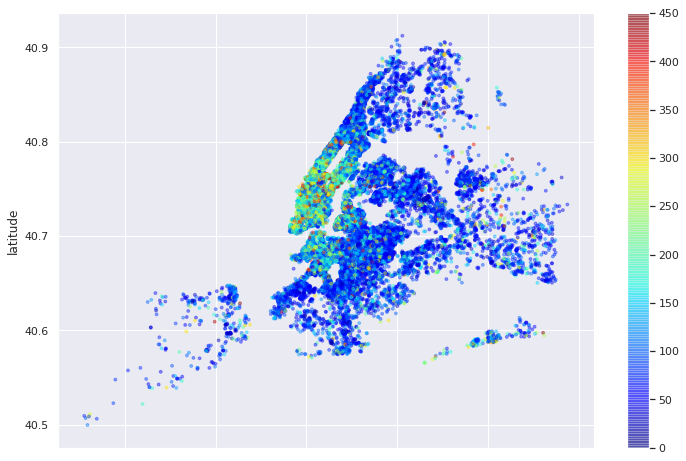

In [0]:
# plotting a map of the listings using their coordinates
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q9. What's the average number of minimum nights to rent an Airbnb in New York City?**

In [0]:
# checking the average for minimum_nights
print('Average minimum_nights:\t',  df_clean.minimum_nights.mean())

Average minimum_nights:	 4.640014048232264


### **Q9. Is there correlation between the type of room and the minimum number of nights in New York City?**

As seen before, it's illegal to rent out a house or an apartment in New York City for less than 30 days without the permanent tenant residing there.

This piece of information would have us believe that the average number of minimum nights to rent out an entire apartment in New York City would be higher than that of renting a room.

To check that, let's see if there's any correlation between the type of the room and the minimum number of nights for each type.

Since the variable [room_type] is categorical and [minimum_nights] is numerical, to correlate both we need to transform [room_type] into a numerical type of variable. To do so, we'll need *dummy variables*

In [0]:
# creating dummy variables to check correlation between Room Type and Minimum Nights
room_type_dummies = pd.get_dummies(df_clean['room_type'], prefix='room_type')
df_clean = pd.concat([df_clean, room_type_dummies], axis=1)
df_clean.drop('room_type', axis=1, inplace=True)

display(df_clean.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225,1,46,2019-07-14,0.39,2,288,1,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150,3,0,NaN,NaN,1,365,0,1,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,200,3,75,2019-07-21,0.60,1,127,1,0,0
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,79,2,118,2017-07-21,0.98,1,0,0,1,0


In [0]:
# correlation matrix between the variables of interest
corr = df_clean[['minimum_nights', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']].corr()

# display correlation matrix
display(corr)

,minimum_nights,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
minimum_nights,1.000000,0.095155,-0.094158,-0.003475
room_type_Entire home/apt,0.095155,1.000000,-0.952535,-0.156515
room_type_Private room,-0.094158,-0.952535,1.000000,-0.151592
room_type_Shared room,-0.003475,-0.156515,-0.151592,1.000000


**The matrix above shows us that there is a correlation between the type of room and the number of minimum nights.**

This supports our theory that the law on number of nights has an effect on Airbnb Listings, and that the minimum number of nights to rent out entire properties is higher than the one for only a room.

## Data Analysis Conclusions

**This was a simple analysis on a summarized dataset made available by Airbnb on New York City. Our analysis can help us get to some coclusions:**
* The closer you are to Midtown, and the Lower Manhattan Area, the more expensive it gets.
* The average price for an Airbnb in New York City is US$ 126.16 per night
* The average minimum number of nights you need to get in a New York City listing is 4.6
* There is a correlation between the minimum number of nights and the type of room listed.
* Despite the law regarding the minimum number of nights to rent an entire house/apartment i New York City, this is still the most common listing for the city. 

## Listing Price Prediction - XGBoost
After analyzing and understanding the data, it's time to build a *Machine Learning* model to predict the price of the listings.

To do that, we'll use **XGBoost**, which is the leading model for working with standard tabular data. XGBoost models dominate many Kaggle competitions, especially because of their accuracy.

XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm.

In [0]:
# importing the necessary libraries
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

After importing the necessary libraries we must select the features to be used in our model.

At first, we can identify some features that have no to minimal impact on the price of the listings, so we're going to dismiss them.

In our case, we can see that the **id, name of the listing, host id, and name as well as the date of the last review** have no impact on the price of the listing.

Of course, we may argue that elements in the name might be related to something that can contribute to the price. However, all of the said elements would be present in other variables, rendering this column useless.

Also, we have seen before that many hosts have more than one listing and that the host can give certain touches to their listings making them more expensive and, therefore, the host id could influence the price. It makes sense, but it's not relevant for us now.


In [0]:
# dropping columns / selecting the features
df_clean.drop(['id', 'name', 'host_id','host_name', 'last_review', 'last_review'], axis=1, inplace=True)
df_clean.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Manhattan,Midtown,40.75362,-73.98377,225,1,46,0.39,2,288,1,0,0
1,Manhattan,Harlem,40.80902,-73.94190,150,3,0,NaN,1,365,0,1,0
3,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0
4,Manhattan,Murray Hill,40.74767,-73.97500,200,3,75,0.60,1,127,1,0,0
7,Manhattan,Upper West Side,40.80178,-73.96723,79,2,118,0.98,1,0,0,1,0


Once we've selected our features, it's time to prepare them for the model. In order to implement our *Machine Learning* model, we need to make sure all of the variables are of the right type, and if they aren't, convert them.

We have previously identified that the variables [neighbourhood] and [neighbourhood_group] are of the type **object** and we need to convert them into numerical variables.

To do that, we'll first
* Create *Dummy Variables* for the feature neighbourhood_groups.
* Create Categorical Codes for the feature neighbourhood.

In [0]:
# dummies for neighbourhood_group
neighbourhood_group_dummies = pd.get_dummies(df_clean['neighbourhood_group'], prefix='neighbourhood_group')
df_clean = pd.concat([df_clean, neighbourhood_group_dummies], axis=1)
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

df_clean.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,Midtown,40.75362,-73.98377,225,1,46,0.39,2,288,1,0,0,0,0,1,0,0
1,Harlem,40.80902,-73.94190,150,3,0,NaN,1,365,0,1,0,0,0,1,0,0
3,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0
4,Murray Hill,40.74767,-73.97500,200,3,75,0.60,1,127,1,0,0,0,0,1,0,0
7,Upper West Side,40.80178,-73.96723,79,2,118,0.98,1,0,0,1,0,0,0,1,0,0


In [0]:
# encoding neighbourhood
df_clean["neighbourhood"] = df_clean["neighbourhood"].astype('category')
df_clean.dtypes

# cat.codes
df_clean["neighbourhood"] = df_clean["neighbourhood"].cat.codes
df_clean.head()


,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,126,40.75362,-73.98377,225,1,46,0.39,2,288,1,0,0,0,0,1,0,0
1,93,40.80902,-73.94190,150,3,0,NaN,1,365,0,1,0,0,0,1,0,0
3,61,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0
4,136,40.74767,-73.97500,200,3,75,0.60,1,127,1,0,0,0,0,1,0,0
7,201,40.80178,-73.96723,79,2,118,0.98,1,0,0,1,0,0,0,1,0,0


Now it's time to prepare our model.

Here's what we need to do:
* Identify our target variable (price)
* Separate the dataset into train and test
* Create and train the model
* Evaluate the model's accuracy

In [0]:
# determining X and y
X = df_clean.drop('price', axis=1);
y = df_clean['price']

# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y);

# creating and training the model
ml_model = XGBRegressor(learning_rate=0.25, n_estimators=800,early_stopping_rounds=5,
                         max_depth=4, subsample = 0.9,
                         colsample_bytree = 0.1, gamma=1,
                         random_state=42, njobs=4);
ml_model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Once the model is created and trained, all we have to do is have it make predictions and measure its accuracy.

For that, we'll be looking at 2 parameters:
* Mean Squared Error
* R2 Score

In [0]:
# predictions and probabilities on the test dataset
predictions = ml_model.predict(X_test)

# accuracy of the model
print("Mean Squared Error : " + str(mean_absolute_error(predictions, y_test)))
print("R2 Score : ", r2_score(predictions, y_test))

Mean Squared Error : 39.87043283350862
R2 Score :  0.01010510169168588


# Thank you!

#### Thank you reading my project. If you have found any other insights in this dataset, or have any kind of feedback, please, let me know!

#### Also, feel free to share, modify, translate, or do whatever you need to improve this notebook!

#### Rafael Duarte